## 3.1 Klassifikation mit SVMs

In unserer letzten Übung befassen wir uns mit dem Python-Paket *Scikit Learn*, mit dem sich die meisten Standard-Lernmaschinen auf sehr bequeme (und trotzdem performante) Weise realisieren lassen. Schauen Sie sich zunächst das einführende Tutorium unter [https://scikit-learn.org/1.4/tutorial/basic/tutorial.html](https://scikit-learn.org/1.4/tutorial/basic/tutorial.html) an, um die grundsätzliche Syntax zu erlernen.

Aufgaben:
- [3.1.1 Laden und Untersuchen des MNIST-Datensatzes](#311-laden-und-untersuchen-des-mnist-datensatzes)
- [3.1.2 Trainieren und Testen eines SVM-Klassifikators](#312-trainieren-und-testen-eines-svm-klassifikators)
  - [SVM-Klassifikator mit alternativen Parametern](#svm-klassifikator-mit-alternativen-parametern)
  - [SVM-Klassifikator mit Splitting](#svm-klassifikator-mit-splitting)
  - [SVM-Klassifikator mit Splitting und Shuffling](#svm-klassifikator-mit-splitting-und-shuffling)


### 3.1.1 Laden und Untersuchen des MNIST-Datensatzes 

Laden Sie, wie im Tutorium beschrieben, den berühmten MNIST-Datensatz mit eingescannten handgeschriebenen Ziffern mit der Funktion `digits = load_digits()`. Grundlegende Informationen zum Datensatz erhalten Sie durch Ausgabe des Attributes `digits.DESCR`. Die Merkmalsvektoren (hier Bilder) sind die Zeilen der Designmatrix `digits.data`, die zugehörigen Labels stehen in dem Vektor `digits.target`. Wie in Arbeitsblatt 1 gelernt, finden Sie heraus, wieviele und welche Labels und wieviele Daten es gibt, und welche Dimension diese haben. Stellen Sie eine Zufallsauswahl von 10 Bildern (zusammen mit der Klassenzugehörigkeit) in Ihrem Notebook dar.

#### Laden des Datensatzes

Der MNIST-Datensatz ist in Scikit-Learn bereits vorinstalliert und kann wie in der Aufgabenbeschreibung dargestellt geladen und analysiert werden.

In [1]:
import matplotlib.pyplot as plt         # needed for shown images
from sklearn import datasets

digits = datasets.load_digits()

#### Grundlegende Informationen zum Datensatz

Informationen zu dem Datensatz lassen sich dann wie beschrieben ausgeben:

In [2]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

#### Untersuchung der Datenstruktur

Dies lässt sich auch für einzelne Daten im Datensatz durchführen indem die bekannten Operationen wie `shape` etc. angewendet werden:

In [3]:
digits.images[0].shape

(8, 8)

Wie in der Beschreibung erwähnt bestehen die Bilder aus 8x8 Pixeln, was einer Dimension von 64 für die Merkmalsvektoren (features) entspricht.

In `digits.data` sind die Bilder bereits als Zeilenvektoren abgelegt (Designmatrix), während in `digits.images` die Bilder in ihrer ursprünglichen 8x8 Form vorliegen.

In [4]:
digits.data.shape

(1797, 64)

In [5]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

Die zugehörigen Labels sind in `digits.target` gespeichert.

In [6]:
digits.target.shape

(1797,)

In [7]:
digits.target[0]

0

#### Darstellung von Beispieldaten

Wie bereits unter [digit_recognizion.ipynb](../../scikit-learn/digit_recognizing.ipynb) gezeigt, können die Bilder mit Matplotlib dargestellt werden. Hier eine Zufallsauswahl von 10 Bildern aus dem Datensatz zusammen mit den zugehörigen Labels:

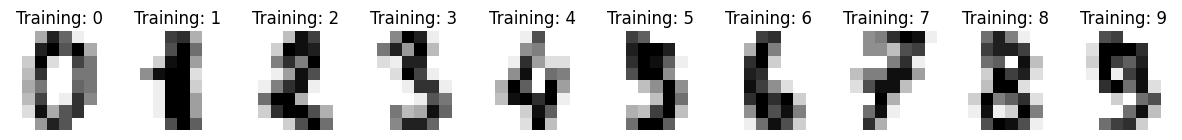

In [8]:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(15,5))
for ax, image, label in zip(axes, digits.images, digits.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
  ax.set_title(f"Training: {label}")

___

### 3.1.2 Trainieren und Testen eines SVM-Klassifikators

Teilen Sie den Datensatz zufällig in einen nichtüberlappenden Trainings- und Testdatensatz auf, so dass ein Viertel der Daten zu Testdaten werden. Dies geschieht am Einfachsten mit der Funktion `sklearn.model_selection.train_test_split()`. Trainieren Sie einen Supportvektor-Klassifikator (Standard in *Scikit Learn* ist eine 1-Norm Soft Margin SVM, bei Mehrklassenproblemen wird automatisch ein Satz von one-vs.-one-Klassifikatoren erstellt) mit einem RBF-Kern mit $\gamma = 0.015$ und einem Parameter $C = 1.0$. Bestimmen Sie den Anteil korrekt klassifizierter Beispiele (Korrektklassifikationsrate, **Treffergenauigkeit**, engl. *Accuracy*) im Trainings- und Testdatensatz mithilfe der Funktion `SVC.score()`. **Underfitting** liegt vor, wenn Ihr Klassifikator auf den Trainingsdatensatz eine Treffergenauigkeit von deutlich unter 100% erzielt, bei **Overfitting** liegt die Treffergenauigkeit auf dem Testdatensatz deutlich unter der auf dem Trainingsdatensatz. Welcher Fall liegt hier vor? Probieren Sie alternativ die SVM-Parameter $\gamma = 0.001$ und $C = 100$ und vergleichen Sie. Wiederholen Sie das Experiment für einen anderen Zufallssplit in Trainings- und Testdatensatz. Wie stark hängt Ihr Ergebnis von der zufälligen Teilung in Trainings- und Testdatensatz ab?


#### Aufteilen in Trainings- und Testdatensatz

Der Datensatz kann wie beschrieben in Trainings- und Testdatensatz aufgeteilt werden. Dies wird ebenfalls Beispielhaft in [digit_recognizion.ipynb](../../scikit-learn/digit_recognizing.ipynb) gezeigt. Hierfür wird die Funktion `train_test_split` aus dem Modul `sklearn.model_selection` verwendet.

In [9]:
from sklearn.model_selection import train_test_split

Anschließend lassen sich die Daten wie gefordert zu 75% Trainings- und 25% Testdaten aufteilen:

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
  digits.data,
  digits.target,
  test_size=0.25,
  shuffle=False
)

> Der Parameter `shuffle=False` sorgt dafür, dass die Daten nicht zufällig gemischt werden, bevor sie aufgeteilt werden. Dies ist wichtig, wenn die Daten bereits in einer bestimmten Reihenfolge vorliegen (z.B. sortiert nach Klassen) und man sicherstellen möchte, dass die Aufteilung in Trainings- und Testdatensatz diese Reihenfolge beibehält. In diesem Fall werden die ersten 75% der Daten als Trainingsdaten und die letzten 25% als Testdaten verwendet.

Mit dem folgenden Code kann die Aufteilung dann noch geprüft werden (der Testdatensatz hatte ursprünglich 1797 Samples mit jeweils 64 Features):

In [11]:
print(f"Shape of X_train: {X_train.shape} \tsize: {len(X_train) * 100 / len(digits.data):0.2f}%")
print(f"Shape of X_test: {X_test.shape} \tsize: {len(X_test) * 100 / len(digits.data):0.2f}%")
print(f"Shape of y_train: {y_train.shape} \tsize: {len(y_train) * 100 / len(digits.data):0.2f}%")
print(f"Shape of y_test: {y_test.shape} \tsize: {len(y_test) * 100 / len(digits.data):0.2f}%")

Shape of X_train: (1347, 64) 	size: 74.96%
Shape of X_test: (450, 64) 	size: 25.04%
Shape of y_train: (1347,) 	size: 74.96%
Shape of y_test: (450,) 	size: 25.04%


Schaut soweit gut aus :)

#### Training eines SVM-Klassifikators

Um einen SVM-Klassifikator zu trainieren, wird das Modul `svm` aus `sklearn` importiert...

In [12]:
from sklearn import svm

anschließend lässt sich der Klassifikator mit den geforderten Parametern von $\gamma=0.015$ und $C=1$ initialisieren:

In [13]:
clf = svm.SVC(gamma=0.015, C=1)
clf

SVC(C=1, gamma=0.015)

Nach der Initialisierung des Klassifikators kann dieser mit den Trainingsdaten mittels der `fit`-Methode trainiert werden:

In [14]:
clf.fit(X_train, y_train)

SVC(C=1, gamma=0.015)

#### Vorhersagen mittels des trainierten Klassifikators

Nach dem Training des Klassifikators können Vorhersagen für neue Daten (hier die Testdaten) mit der `predict`-Methode durchgeführt werden. Die Vorhersagen werden in einem Array gespeichert:

In [15]:
predicted = clf.predict(X_test)

`predicted` enthält nun die vorhergesagten Labels für die Testdaten. Einzelne Vorhersagen können dann wie folgt ausgegeben werden:

In [16]:
predicted[0]

3

Das erste Bild des Testdatensatzes wurde also als eine "3" klassifiziert. Um dies zu überprüfen kann das entsprechende Bild aus dem Testdatensatz dargestellt werden:

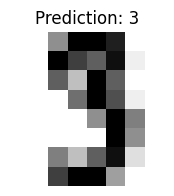

In [17]:
_, ax = plt.subplots(nrows=1, ncols=1, figsize=(2,2))
ax.set_axis_off()
image = X_test[0].reshape(8,8)
ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
ax.set_title(f"Prediction: {predicted[0]}")
plt.show()

Hätte auch gesagt, dass das ne 3 ist. Dies lässt sich aber natürlich auch noch manuell validieren, indem man das Label des ersten Testbeispiels mit dem vorhergesagten Label vergleicht:

In [18]:
y_test[0]

3

Passt...

#### Klassifikationsgenauigkeit (Accuracy) des Klassifikators

Wie beschrieben lässt sich die Treffergenauigkeit (*Accuracy*) des Klassifikators auf den beiden Datensätzen mit der `score`-Methode bestimmen:

In [19]:
clf.score(X_train, y_train)

1.0

In [20]:
clf.score(X_test, y_test)

0.5333333333333333

Einen ausführlicheren Bericht lässt sich auch mit der Funktion `classification_report` aus dem Modul `sklearn.metrics` erstellen, welche neben der Accuracy auch Precision, Recall und F1-Score für jede Klasse ausgibt.

In [21]:
from sklearn import metrics

In [22]:
print(
  f"Classification report for classifier {clf} on test-data-set:\n"
  f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(C=1, gamma=0.015) on test-data-set:
              precision    recall  f1-score   support

           0       1.00      0.65      0.79        43
           1       1.00      0.43      0.61        46
           2       1.00      0.44      0.61        43
           3       1.00      0.55      0.71        47
           4       1.00      0.54      0.70        48
           5       0.18      1.00      0.30        45
           6       1.00      0.40      0.58        47
           7       1.00      0.47      0.64        45
           8       1.00      0.24      0.39        41
           9       1.00      0.58      0.73        45

    accuracy                           0.53       450
   macro avg       0.92      0.53      0.61       450
weighted avg       0.92      0.53      0.61       450




> Erklärung des Berichts (generiert von GPT-5):
> - **Precision (Genauigkeit der Positiven)**:<br>
> Anteil der korrekt als Klasse $k$ vorhergesagten Beispiele unter allen Vorhersagen für $k$ Formel: $\frac{TP}{(TP+FP)}$. „*Wie sauber sind meine Treffer*?“
> - **Recall (Vollständigkeit, Sensitivität)**:<br>
> Anteil der korrekt gefundenen Beispiele der Klasse $k$ unter allen tatsächlichen $k$.
Formel: $\frac{TP}{(TP+FN)}$. „*Wie viel von k habe ich gefunden?*“
> - **F1-Score**:<br>
> Harmonisches Mittel aus Precision und Recall. Balanciert beide Maße.
Formel: $2·\frac{(P·R)}{(P+R)}$. Nützlich, wenn Precision und Recall gleichermaßen wichtig sind.
> - **Support**:<br>
> Anzahl der echten Beispiele der Klasse $k$ im Testset (*y_true*). Dient auch als Gewicht für „weighted avg“.

#### Fazit:

Der trainierte SVM-Klassifikator hat auf dem Trainingsdatensatz eine Genauigkeit von **100%** erreicht, auf dem Testdatensatz jedoch nur etwa **53.33%***.

Dies deutet auf **Overfitting** hin, da der Klassifikator die Trainingsdaten perfekt gelernt hat, aber Schwierigkeiten hat, auf neuen, ungesehenen Daten (Testdatensatz) gut zu *generalisieren*.

Ihr Split nutzt shuffle=False. Dadurch ist der Split nicht zufällig/stratifiziert; Klassenverteilung kann stark verschoben sein oder Klassen fehlen im Train/Test. Das begünstigt die große Lücke.

___

#### SVM-Klassifikator mit alternativen Parametern

Um die Auswirkungen der Parameteränderung zu untersuchen, wird der SVM-Klassifikator mit den neuen Parametern $\gamma = 0.001$ und $C = 100$ initialisiert und erneut trainiert:

In [23]:
clf = svm.SVC(gamma=0.001, C=100)
clf

SVC(C=100, gamma=0.001)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, 
    digits.target, 
    test_size=0.25, 
    shuffle=False
)

In [25]:
print(f"Shape of X_train: {X_train.shape} \tsize: {len(X_train) * 100 / len(digits.data):0.2f}%")
print(f"Shape of X_test: {X_test.shape} \tsize: {len(X_test) * 100 / len(digits.data):0.2f}%")
print(f"Shape of y_train: {y_train.shape} \tsize: {len(y_train) * 100 / len(digits.data):0.2f}%")
print(f"Shape of y_test: {y_test.shape} \tsize: {len(y_test) * 100 / len(digits.data):0.2f}%")

Shape of X_train: (1347, 64) 	size: 74.96%
Shape of X_test: (450, 64) 	size: 25.04%
Shape of y_train: (1347,) 	size: 74.96%
Shape of y_test: (450,) 	size: 25.04%


In [26]:
clf.fit(X_train, y_train)

SVC(C=100, gamma=0.001)

In [27]:
predicted = clf.predict(X_test)
predicted[0]

3

In [28]:
clf.score(X_train, y_train)

1.0

In [29]:
clf.score(X_test, y_test)

0.9688888888888889

In [30]:
print(
  f"Classification report for classifier {clf}:\n"
  f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(C=100, gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.98      1.00      0.99        46
           2       1.00      1.00      1.00        43
           3       1.00      0.87      0.93        47
           4       0.98      0.94      0.96        48
           5       0.94      0.98      0.96        45
           6       0.98      1.00      0.99        47
           7       1.00      1.00      1.00        45
           8       0.89      0.98      0.93        41
           9       0.93      0.96      0.95        45

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450




Neben dem textuellen Bericht lässt sich mittels der Funktion `confusion_matrix` aus dem Modul `sklearn.metrics` auch eine Konfusionsmatrix erstellen, die die Leistung des Klassifikators visuell darstellt.

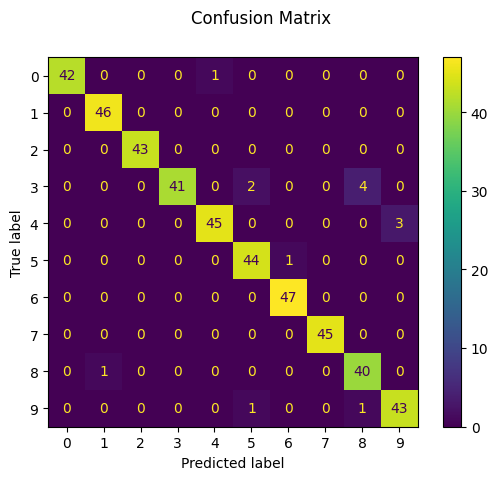

In [31]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

#### Fazit:

Der mit den neuen Parametern trainierte SVM-Klassifikator hat auf dem Trainingsdatensatz eine Genauigkeit von **100%** erreicht, auf dem Testdatensatz nun etwas **96.68%**. Dies deutet darauf hin, dass der Klassifikator mit den neuen Parametern deutlich besser generalisiert so das nur noch etwa 3.32% der Testbeispiele falsch klassifiziert werden.

___

#### SVM-Klassifikator mit Splitting

Anschließend soll der gleiche Test noch mit einem anderen Spitting in Trainings- und Testdatensatz wiederholt werden. Hierzu werden zuerst einzelne Werte manuell angepasst:

In [32]:
clf = svm.SVC(gamma=0.001, C=100)
clf

SVC(C=100, gamma=0.001)

In diesem Versuch wird die `test_size` auf 0.33 gesetzt, also ein Drittel der Daten als Testdaten verwendet. Die `shuffle`-Option mit welcher die Daten vor dem Split zufällig gemischt werden, ist hier weiterhin deaktiviert.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, 
    digits.target, 
    test_size=0.33, 
    shuffle=False
)

Die `shape` der resultierenden Datensätze zeigt die erfolgte Aufteilung:

In [34]:
print(f"Shape of X_train: {X_train.shape} \tsize: {len(X_train) * 100 / len(digits.data):0.2f}%")
print(f"Shape of X_test: {X_test.shape} \tsize: {len(X_test) * 100 / len(digits.data):0.2f}%")
print(f"Shape of y_train: {y_train.shape} \tsize: {len(y_train) * 100 / len(digits.data):0.2f}%")
print(f"Shape of y_test: {y_test.shape} \tsize: {len(y_test) * 100 / len(digits.data):0.2f}%")

Shape of X_train: (1203, 64) 	size: 66.94%
Shape of X_test: (594, 64) 	size: 33.06%
Shape of y_train: (1203,) 	size: 66.94%
Shape of y_test: (594,) 	size: 33.06%


In [35]:
clf.fit(X_train, y_train)

SVC(C=100, gamma=0.001)

In [36]:
predicted = clf.predict(X_test)
predicted[0]

5

In [37]:
clf.score(X_train, y_train)

1.0

In [38]:
clf.score(X_test, y_test)

0.9747474747474747

#### Fazit:

Die folgenden Werte wurden ermittelt:
- `test_size=0.5` Accuracy auf Testdaten: ca. 96.996 %
- `test_size=0.33` Accuracy auf Testdaten: ca. 97.47 %

Eine Anpassung der Split-Größe auf 50% zeigt bereits eine Verbesserung der Genauigkeit. Interessant ist, dass diese noch höher wird wenn der Split wieder auf 33% verkleinert wird.

___

#### SVM-Klassifikator mit Splitting und Shuffling

Anschließend soll geprüft werden, wie sich ein zufälliges Mischen der Daten vor dem Split auf die Ergebnisse auswirkt. Hierzu wird der Parameter `shuffle` auf `True` gesetzt was bewirkt, dass die Daten vor der Aufteilung in Trainings- und Testdatensatz zufällig gemischt werden.

> Wird `shuffle=True` gesetzt und der Parameter `random_state` nicht festgelegt, so wird bei jedem Ausführen des Codes eine andere zufällige Aufteilung der Daten vorgenommen. Dies kann zu unterschiedlichen Ergebnissen führen, da die Trainings- und Testdatensätze bei jedem Lauf unterschiedlich zusammengesetzt sind. Um reproduzierbare Ergebnisse zu erhalten, sollte `random_state` auf einen festen Wert gesetzt werden.

In [39]:
clf = svm.SVC(gamma=0.001, C=100)
clf

SVC(C=100, gamma=0.001)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, 
    digits.target, 
    test_size=0.33, 
    shuffle=True
)

In [41]:
print(f"Shape of X_train: {X_train.shape} \tsize: {len(X_train) * 100 / len(digits.data):0.2f}%")
print(f"Shape of X_test: {X_test.shape} \tsize: {len(X_test) * 100 / len(digits.data):0.2f}%")
print(f"Shape of y_train: {y_train.shape} \tsize: {len(y_train) * 100 / len(digits.data):0.2f}%")
print(f"Shape of y_test: {y_test.shape} \tsize: {len(y_test) * 100 / len(digits.data):0.2f}%")

Shape of X_train: (1203, 64) 	size: 66.94%
Shape of X_test: (594, 64) 	size: 33.06%
Shape of y_train: (1203,) 	size: 66.94%
Shape of y_test: (594,) 	size: 33.06%


In [42]:
clf.fit(X_train, y_train)

SVC(C=100, gamma=0.001)

In [43]:
predicted = clf.predict(X_test)
predicted[0]

6

In [44]:
clf.score(X_train, y_train)

1.0

In [45]:
clf.score(X_test, y_test)

0.98989898989899

#### Fazit:

Der beste erreichte Wert (ohne `random_state` für Reproduzierbarkeit) lag bei ca. **99.15%**. Nach mehrfachem ausführen ist jedoch erkennbar, dass die Genauigkeit meistens bei etwa **98.5% bis 99%** liegt. Das zufällige Mischen der Daten vor dem Split scheint also die Generalisierungsfähigkeit des Klassifikators zu verbessern, da die Trainings- und Testdatensätze dadurch eine repräsentativere Stichprobe der gesamten Datenverteilung darstellen.